In [5]:
from desdeo_mcdm.utilities.solvers import solve_pareto_front_representation
from desdeo_emo.EAs import NSGAIII
from modules.utils import save
from modules.GeometryDesign.problem import create_problem
import numpy as np
import warnings
warnings.filterwarnings("ignore") # ignore warnings :)


# Creating geometry design problem : tent like buildings
# Which objectives do you wish to optimize
# surface area, volume, min height and floor area
obj = np.array([
    True, True, True, True, # Optimizing Surface area and min height and ignoring others,
])

# ideal and nadir in respective order
# ideal = 0, 1, 1, 1
# nadir = 5, 0, 0, 0


# Set constraint for objectives, [lower, upper]
# If no constraint then set it to None
# Each row represents a objective function in the same order as in obj_gd 
# Notice that breaking constraints will result in a penalty and therefore we might get results that break the constraints
# constraints = np.array([
#     [0.2, None], # Surface area > 0.2
#     [.5, .8], # .5 < volume < .8. Even though we're not optimizing volume, we can set a constraint on it  
#     [.4, None], #  min height > .4
#     [None, 0.6], # floor area < .6 
# ])
constraints = None
# How many 3d points should the hull be formed of
# more points => More complex problem : longer execution times
# Less points => More likely to fail in constructing the hull
variable_count = 4 # Around 15 - 25 seems to be good enough

# To create the problem we can call the gd_create method with the parameters defined earlier
# the pfront argument should be set to True if using the solve_pareto_front_representation method as it doesn't 
# take account minimizing/maximizing. For everything else we can set it to False
# The method returns a MOProblem and a scalarmethod instance which can be passed to different Desdeo objects
problem, method = create_problem(variable_count , obj, constraints, pfront = True, constant_floor=True)

# Two methods to solve the problem are shown below. Do not use them both at the same time!
# Use one, and comment out the other!

# Example on solving the pareto front : This might take some time so feel free to comment this out (lines 57 and 60).

# We will use the solve_pareto_front_representation method but one can change this to something else.
# The method takes the problem instance and a step size array

# The method will create reference points from nadir to ideal with these step sizes
# in this case : ref points = [[5,0,0,0], [4.5, 0, 0, 0], [4, 0, 0, 0] ... [5, 0.2, 0, 0] ... [0, 1, 1, 1]]
# large step sizes => less solutions but faster calculation
# step_sizes = np.array([.5, .2, .2, .2])[obj]

# # The method returns the decision vectors and corresponding objective vectors
# var, obj = solve_pareto_front_representation(problem, step_sizes, solver_method= method)

# Example on solving the pareto front using NSGA-III

evolver = NSGAIII(problem,
                  n_iterations=10,
                  n_gen_per_iter=100,
                  population_size=100)

while evolver.continue_evolution():
    evolver.iterate()

var, obj, _ = evolver.end()

# save the solution if you wish, make sure to change the name to not accidentally overwrite an existing solution.
# Saved solutions can be used later to visualize it
# The solution will be saved to modules/DataAndVisualization/'name'
# save("gdExample", obj, var, problem.nadir, problem.ideal)


In [6]:
import pandas as pd
df = pd.DataFrame(var)
df.to_csv("decision_vectors_4.csv")

df = pd.DataFrame(obj)
df.to_csv("decision_objectives_4.csv")

Text(0, 0.5, 'Volume')

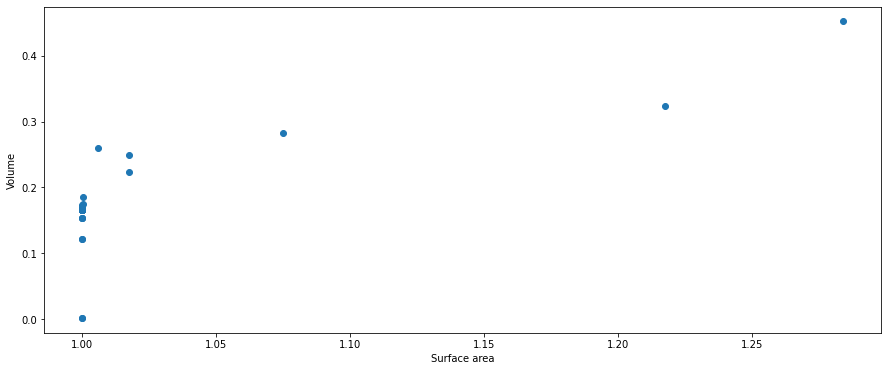

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,6))
plt.scatter(obj[:,0], -obj[:,1])
plt.xlabel("Surface area")
plt.ylabel("Volume")

(8, 3)
-0.45174235263700535


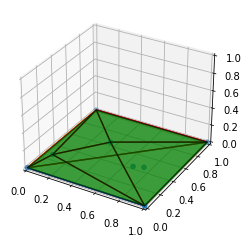

-0.32394304032564014


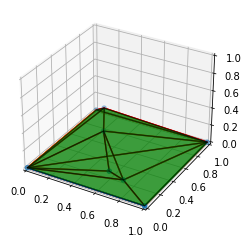

-0.28194771259267254


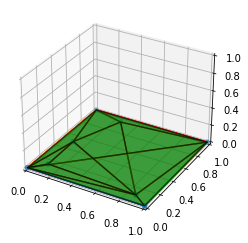

-0.2594924524790763


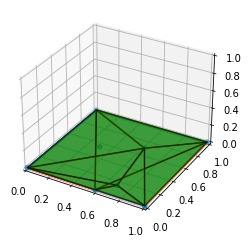

-0.22396576872804544


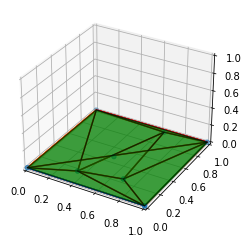

-0.2485848276324031


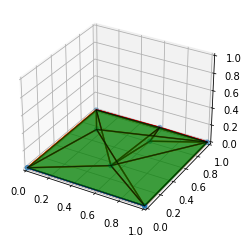

-0.1745631695772722


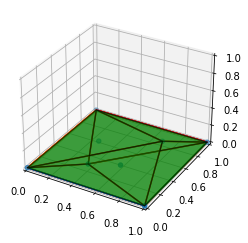

-0.1854619422900973


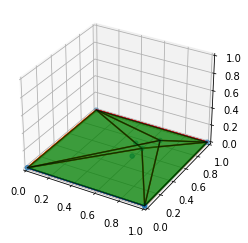

-0.17398698113134073


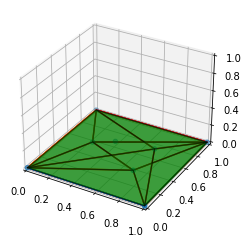

-0.17038423109185932


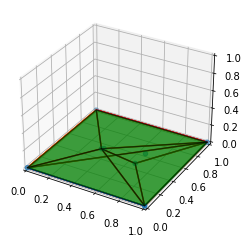

-0.1678787716857483


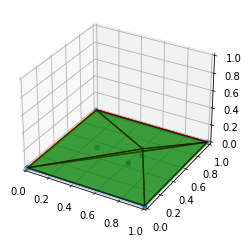

-0.16729284937503716


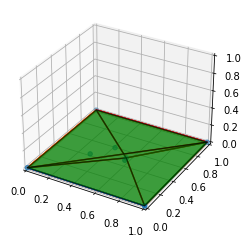

-0.002060455523361242


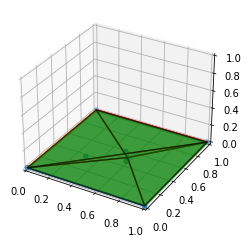

-0.002060455523361242


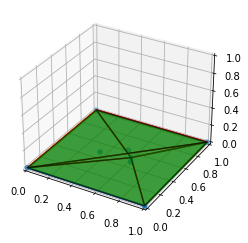

-0.1541750375858989


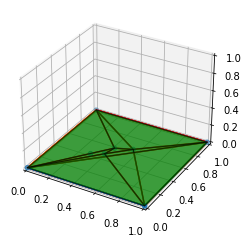

-0.1541750375858989


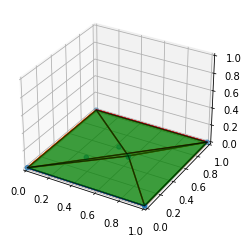

-0.1541750375858989


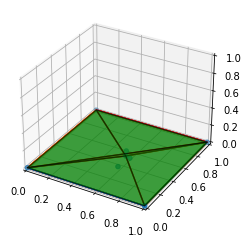

-0.16604632295138894


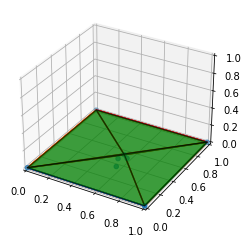

-0.16604632295138894


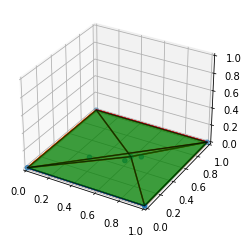

-0.16604632295138894


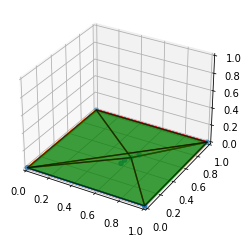

-0.16604632295138894


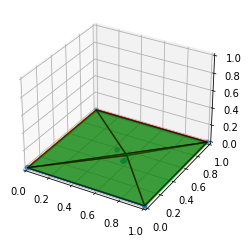

-0.16604632295138894


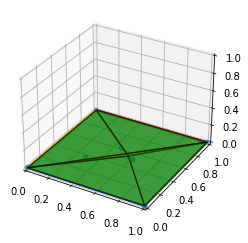

-0.16604632295138894


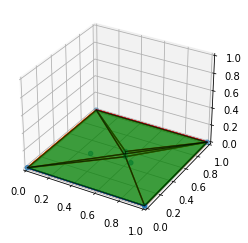

-0.16604632295138894


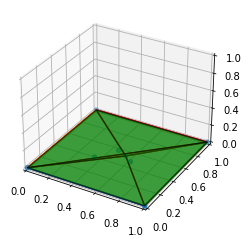

-0.16604632295138894


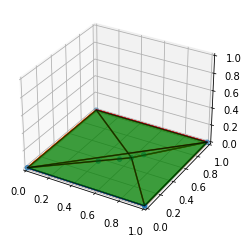

-0.16604632295138894


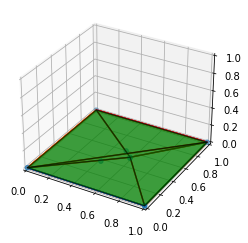

-0.12136060019339359


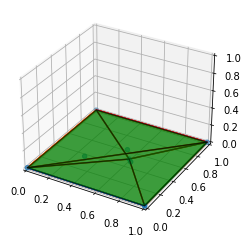

-0.12136060019339359


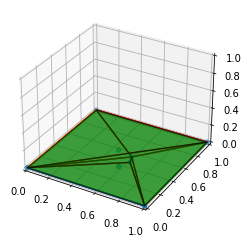

In [8]:
from modules.GeometryDesign.tent import Tent
box_points = np.array([
        [0,0,0], [1,0,0], [0,1,0], [1,1,0], # floor corners
        [0,0,1], [1,0,1], [0,1,1], [1,1,1] # Ceiling/roof corners
    ])
print(box_points.shape)

i=0
for coordenadas in var:
    print(obj[i,1])
    box_points = np.reshape(coordenadas, (variable_count + 4, 3))
    # Instansiate the object
    box = Tent(box_points)
    # Plot the box
    box.plot()
    i+=1